In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
train_df = pd.read_csv("data/House Prices - Advanced Regression Techniques/train.csv")
test_df = pd.read_csv("data/House Prices - Advanced Regression Techniques/test.csv")
sale_df = pd.read_csv("data/House Prices - Advanced Regression Techniques/sample_submission.csv")

In [84]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [85]:
train_df = train_df.sort_values(by=["SalePrice"])

In [86]:
train_df[["SalePrice", "GrLivArea"]]

,SalePrice,GrLivArea
495,34900,720
916,35311,480
968,37900,968
533,39300,334
30,40000,1317
...,...,...
803,582933,2822
898,611657,2364
1169,625000,3627
1182,745000,4476


In [87]:
train_df = train_df[(train_df["GrLivArea"] < 4000) & (train_df["SalePrice"] < 700000)]

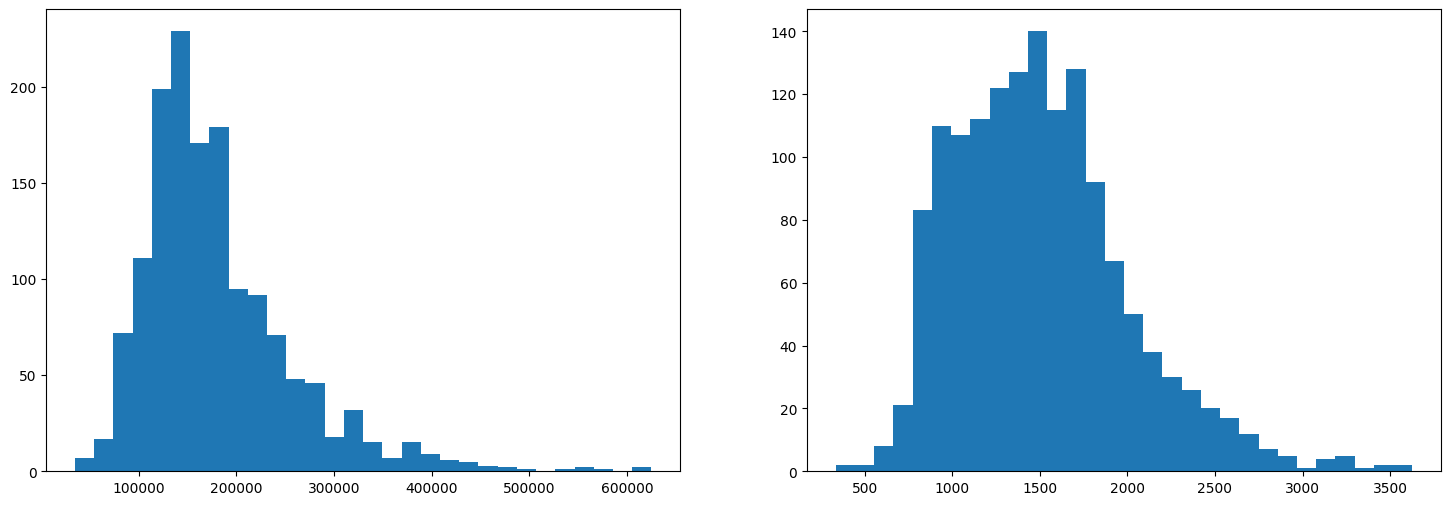

In [88]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.hist(x=train_df["SalePrice"], bins=30)
plt.subplot(1,2,2)
plt.hist(x=train_df["GrLivArea"], bins=30)
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

In [90]:
df = pd.get_dummies(train_df, drop_first=True, dtype="int")
df_for_tree_2 = df
test_df = pd.get_dummies(test_df, drop_first=True, dtype="int")

In [91]:
df["TotalArea"] = df["TotalBsmtSF"] + df["GrLivArea"]
df["HavePool"] = np.where(df["PoolArea"] > 0, 1, 0)

In [92]:
y = np.log1p(df['SalePrice'])

In [93]:
df = df.drop(['Id', 'SalePrice'], axis=1)

In [94]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(df)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

In [96]:
tree_1 = DecisionTreeRegressor(max_depth=6, random_state=42)   # глубина не важна
tree_1.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [97]:
importances = tree_1.feature_importances_
feature_names = df.columns

In [98]:
top_features = pd.DataFrame({
    'признак': feature_names,
    'важность': importances
}).sort_values(by='важность', ascending=False)

In [99]:
pred = tree_1.predict(X_test)
pred = np.expm1(pred)
y_test = np.expm1(y_test)

In [100]:
R2_tree_1 = r2_score(y_test, pred)
RMSE_tree_1 = root_mean_squared_error(y_test, pred)
MAE_tree_1 = mean_absolute_error(y_test, pred)
print(f"R2: {R2_tree_1}")
print(f"RMSE: {RMSE_tree_1}")
print(f"MAE: {MAE_tree_1}")

R2: 0.8201373242885244
RMSE: 31650.862543619533
MAE: 22209.26325754195


In [101]:
list_top_features = top_features["признак"].head(20).tolist()
list_top_features

['OverallQual',
 'TotalArea',
 'CentralAir_Y',
 'GarageCars',
 'GrLivArea',
 'GarageArea',
 'OverallCond',
 'BsmtFinSF1',
 'GarageType_Detchd',
 'LotArea',
 'SaleCondition_Family',
 'Fireplaces',
 'YearRemodAdd',
 'ExterCond_Fa',
 'Electrical_SBrkr',
 '2ndFlrSF',
 'TotalBsmtSF',
 'YearBuilt',
 '1stFlrSF',
 'BsmtQual_Gd']

In [102]:
df_tree_2 = df_for_tree_2[list_top_features]
rt = train_df["SalePrice"].values.reshape(-1,1)
df_tree_2["SalePrice"] = rt

C:\Users\polis\AppData\Local\Temp\ipykernel_12300\1998493292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree_2["SalePrice"] = rt


In [103]:
X_2 = df_tree_2.drop(columns=["SalePrice"])
y_2 = np.log1p(df_tree_2["SalePrice"])

In [104]:
X_scaler_2 = scaler.fit_transform(X_2)

In [105]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaler_2, y_2, test_size=0.2, random_state=42) 

In [106]:
tree_2 = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_2.fit(X_train_2, y_train_2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [107]:
pred_2 = tree_2.predict(X_test_2)
pred_2 = np.expm1(pred_2)
y_test_2 = np.expm1(y_test_2)

In [108]:
R2_tree_2 = r2_score(y_test_2, pred_2)
RMSE_tree_2 = root_mean_squared_error(y_test_2, pred_2)
MAE_tree_2 = mean_absolute_error(y_test_2, pred_2)
print(f"R2: {R2_tree_2}")
print(f"RMSE: {RMSE_tree_2}")
print(f"MAE: {MAE_tree_2}")

R2: 0.821087109488809
RMSE: 31567.18394925292
MAE: 21937.068610484373


In [109]:
rmsle_tree_1 = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(pred)))
rmsle_tree_2 = np.sqrt(mean_squared_error(np.log1p(y_test_2), np.log1p(pred_2)))

In [110]:
print(f"R2 tree_1: {R2_tree_1}     | R2 tree_2: {R2_tree_2}")
print(f"RMSE tree_1: {RMSE_tree_1}   | RMSE tree_2: {RMSE_tree_2}")
print(f"MAE tree_1: {MAE_tree_1}     | MAE tree_2: {MAE_tree_2}")
print(f"RMSLE tree_1: {rmsle_tree_1} | RMSLE tree_2: {rmsle_tree_2}")

R2 tree_1: 0.8201373242885244     | R2 tree_2: 0.821087109488809
RMSE tree_1: 31650.862543619533   | RMSE tree_2: 31567.18394925292
MAE tree_1: 22209.26325754195     | MAE tree_2: 21937.068610484373
RMSLE tree_1: 0.17350312438851123 | RMSLE tree_2: 0.17373755003727034


In [111]:
test_df["TotalArea"] = test_df["TotalBsmtSF"] + test_df["GrLivArea"]
test_df["HavePool"] = np.where(test_df["PoolArea"] > 0, 1, 0)
test_ids = test_df['Id']

In [112]:
test_df = test_df[list_top_features]
X_test_df = scaler.fit_transform(test_df)

In [113]:
prediction = tree_2.predict(X_test_df)
prediction = np.expm1(prediction)

In [114]:
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': prediction
})

In [119]:
submission.to_csv("answer/submission.scv", index=False)

In [120]:
# TOP 4869/5870*